<a href="https://colab.research.google.com/github/Tanish-Aravind/CODING-SAMURAI-INTERNSHIP-TASK/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

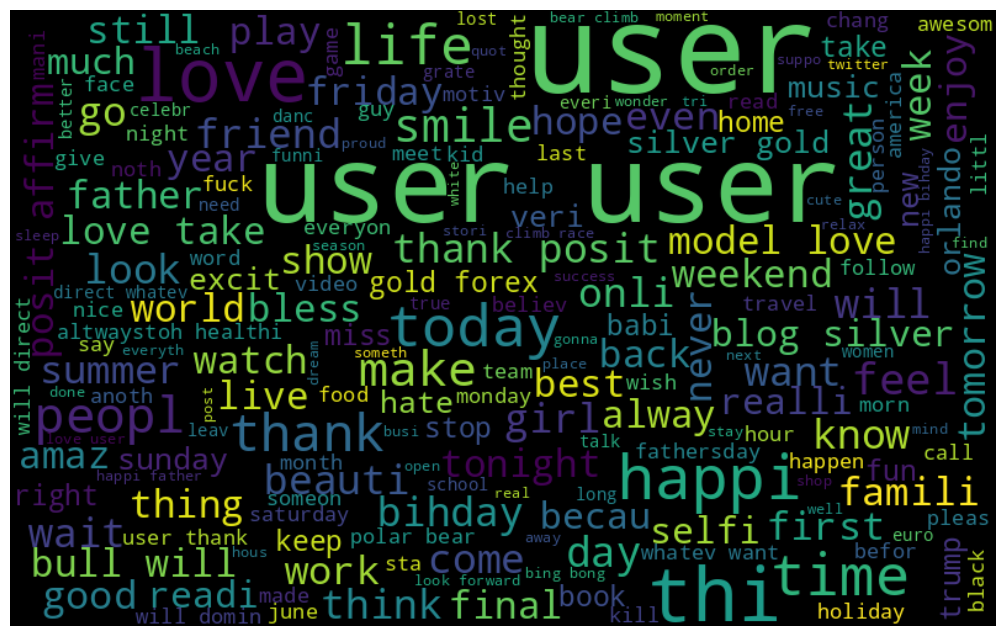

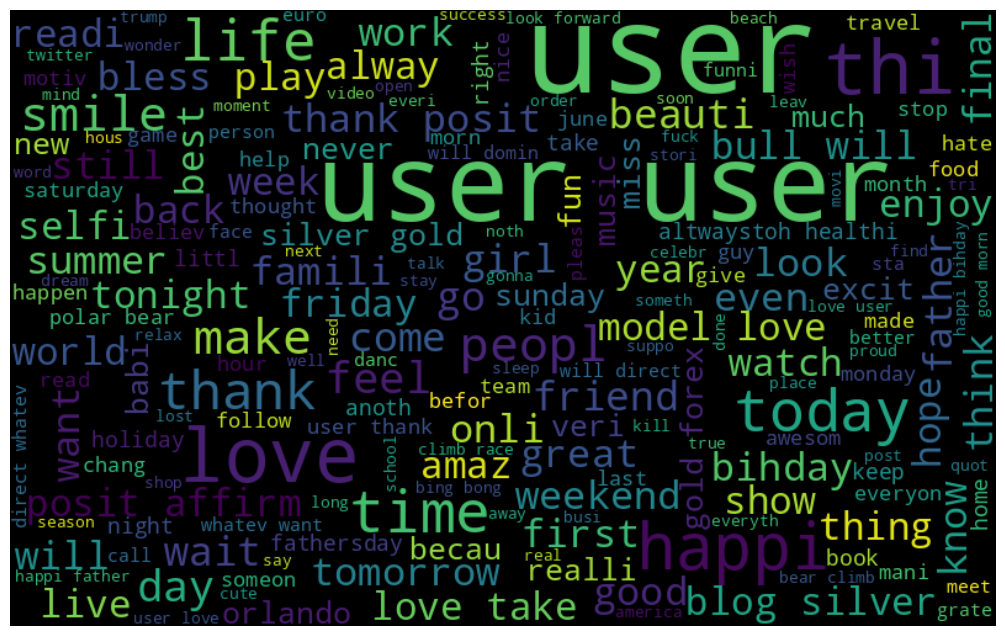

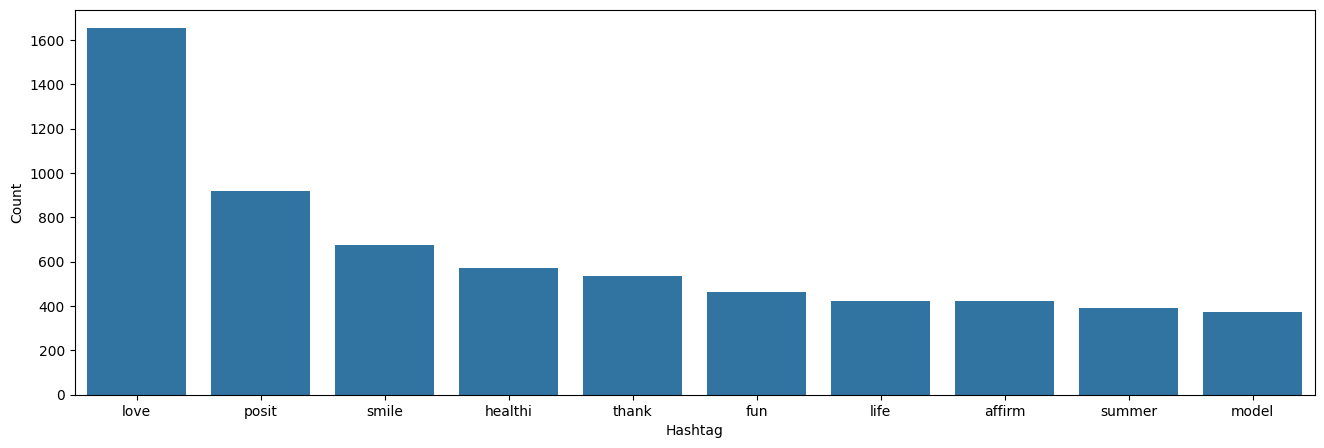

In [5]:
# Label: read_csv
import pandas as pd
import re
df = pd.read_csv("Twitter Sentiments.csv")

# Label: remove_pattern_function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

# Label: clean_tweet_creation
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "RT @[\w]*:")
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# Label: tokenization
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

# Label: stemming
from nltk import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

# Label: rejoin_tokens
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet

# Visualization for Twitter
# Label: wordcloud_all
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Label: wordcloud_positive
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Label: hashtag_extraction_function
def hastag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# Label: hashtag_extraction_positive
ht_positive = hastag_extract(df['clean_tweet'][df['label']==0])

# Label: hashtag_extraction_negative
ht_negative = hastag_extract(df['clean_tweet'][df['label']==1])

ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

# Label: hashtag_frequency
import nltk
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})

# Label: plot_top_hashtags
import seaborn as sns
d = d.nlargest(columns="Count", n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
plt.show()